Image processing involves performing operations on images to enhance them, extract features, or prepare them for other applications like computer vision or machine learning.

 It can be broken into two types:
•	Analog Image Processing: Applied to hard copies like photographs.

•	Digital Image Processing: Manipulation of images in digital form using computers.


Common goals:
•	Noise reduction
•	Image enhancement
•	Image restoration
•	Object detection and recognition
________________________________________


applications of IP

1 - medical field

2 - remote sensing

3 - industrial app

4 - security 

5 - robotics

6 multimedia 

image represntation 

--Pixels :-

An image is made of tiny elements called pixels (picture elements). Each pixel represents an intensity value.

#### 2 types of images
1 -- black and white image -- grey scale image 
2 --- RGB -- Red , green , blue 

--Bit Depth --Defines how many different intensity levels a pixel can represent:
1 -- 1-bit  :- 2 level (black and white)

2 -- 8bit--256 levels of grayscale image  (0 = black , 255= white )

3 --24-bit color image -- RGB -- 8 bit for each channel 
      ---- 256 x 256x 256 

## grayscale vs color image

1 Grayscale image -- One channel , each pixel has intensity between 0-255

2 color image -- 3 channel (RGB or BGR) , each pixel has a tuple like (R,G,B)


## Lib used for image processing 
OpenCV:

•	C++ library with Python bindings.

•	Efficient for real-time computer vision applications.

•	Handles image/video processing, machine learning, and 
more.

Pillow (PIL):

•	Simpler Python imaging library.

•	Good for basic tasks (image open, crop, rotate, save).

•	Useful in web apps, scripting, and when GUI isn’t required.


In [39]:
## loading ,display and saving image 
##opencv  -- pip install opencv-python
# using matplotlib
# import cv2 
# import matplotlib.pyplot as plt
# img=cv2.imread(r"D:\c data\06-05-25 download\dc-comics-batman-rooftop-desktop-wallpaper.jpg")
# print(img.shape)
# plt.imshow(img)  #display

##
# import cv2 
# img = cv2.imread(r"D:\c data\06-05-25 download\dc-comics-batman-rooftop-desktop-wallpaper.jpg")
# cv2.imshow("batman",img)
# cv2.imwrite("batman.jpg",img) ##save
# cv2.waitKey(0)   ##wait for key
# cv2.destroyAllWindows()

# ##with pillow
# from PIL import Image
# img = Image.open(r"D:\c data\06-05-25 download\dc-comics-batman-rooftop-desktop-wallpaper.jpg")
# img.show()
# # img.save("batman.jpg")
#print(img.shape)
#print(img.size)
#print(img.dtype)

In [40]:
##image attributes
#shape -- Dimension(Height,Width,Channels)
##size -- total number of pixels 
##dtype -- data type of each pixel (usuallly int8)

In [41]:
##Transformations: Scaling, Translation, Rotation, Affine

In [42]:
##scaling(Resize) -Changes the size of an image—either enlarging or shrinking
#scaled_img = cv2.resize(image,(new_width,new_height))

import cv2
# cv2.resize(image,(200,400))
# cv2.resize(image,(0,0),fx=1.5,fy=1.5)
#(0,0) -This tells OpenCV not to use a
#  fixed width and height directly.
# Instead, OpenCV will calculate the output
#  size using fx and fy.(scaling factors)
##1.5 times -- 200 x 1.5 = 300
import matplotlib.pyplot as plt
img=cv2.imread(r"D:\c data\06-05-25 download\dc-comics-batman-rooftop-desktop-wallpaper.jpg")
# scaled_img = cv2.resize(img,(1000,200))
# print(img.shape)
# plt.imshow(scaled_img)  #display


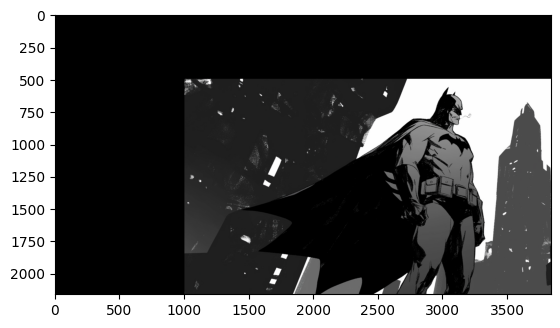

In [43]:
##translation -Changes the location of an image on the screen
# Moves an image from one location to another in the 2D plane.
import numpy as np 
rows, cols = img.shape[:2]
tx , ty = 1000, 500
##translate right by 100 and down by 50 
M = np.float32([[1,0,tx],[0,1,ty]])
#🔹 First Row: [1, 0, tx]
# 1 → Keep x-coordinate as it is.

# 0 → Don’t mix in the y-coordinate.

# tx → Add this amount to x.


translated_image = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(translated_image)
plt.show()

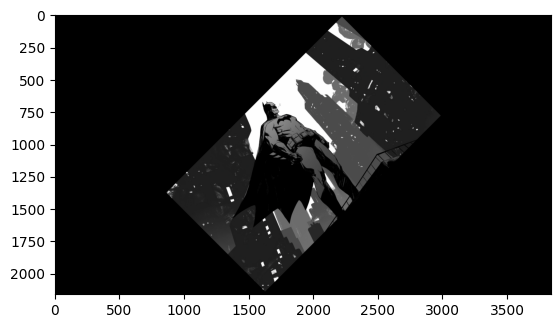

In [44]:
##rotation --Rotates the image around a center point.
center = (cols //2,rows //2)
angle = 45 
scale = 0.5
## scale - zoom in ya zoom out
#1 == original size , <1 == zoom out , >1 == zoom in
M = cv2.getRotationMatrix2D(center,angle,scale)
rotated_img = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(rotated_img)
plt.show()

In [45]:
#affine -- translate , rotate , scale , slant ya combine 
# affine preserves -- points , straight lines , paralllel line 

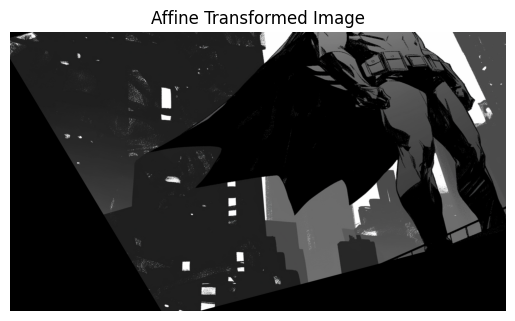

In [46]:
# Define 3 points from original and destination
##define 3 points from source image 
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
##define where those points should move to 
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

M = cv2.getAffineTransform(pts1, pts2)

affine_image = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(affine_image)
plt.title("Affine Transformed Image")
plt.axis('off')
plt.show()


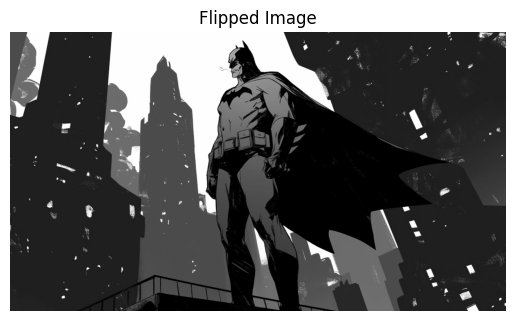

In [47]:
##flipping --Flipping means mirroring the image across an axis.

flipped_image = cv2.flip(img, 1)     ##flipcode 
#0 --flip vertically 
#1 --flip horizontally
#-1 --flip both
plt.imshow(flipped_image)
plt.title("Flipped Image")
plt.axis('off')
plt.show()

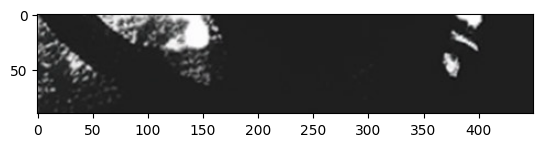

In [48]:
#cropping an Image 
##cropping is just slicing an array 
# cropped = image[y1:y2, x1:x2]
# x1:x2 → range along the width (columns)

# y1:y2 → range along the height (rows)

cropped = img[10:100,50:500]
plt.imshow(cropped)


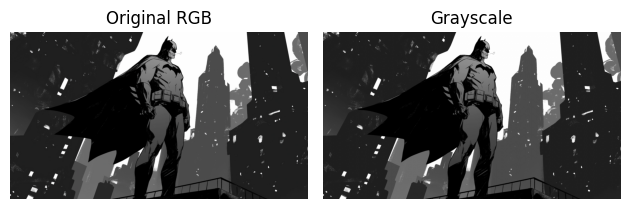

In [49]:
#RGB to Grayscale conversion

# gray = 0.299 . R + 0.587 . G + 0.114 . B
## red and green unnhke uper human eye is more sensitive
# img = cv2.imread(r"D:\c data\06-05-25 download\pokemon-starters-trio-desktop-wallpaper.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray,cmap='gray')
# plt.show()
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original RGB")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.tight_layout()
plt.show()


In [50]:
##histogram -- that show the freq of pixel intensity values in an image

import matplotlib.pyplot as plt
import cv2
# img = cv2.imread(r"D:\c data\06-05-25 download\pokemon-starters-trio-desktop-wallpaper.jpg")
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
##0 -- channeel -- 0 for red , 1 for green , 2 for blue
##0--channel - grayscale
##mask --none - compute histogram for the whole image 
##histsize -- number of bins(interval)
##ranges -- range of pixel values
#“Calculate the histogram of img, using 256 bins for pixel values
#  from 0 to 255, across the full image, for the first channel.”
hist[255] ## number of completley white pixels 
# plt.plot(hist)
# plt.show()

array([27254.], dtype=float32)

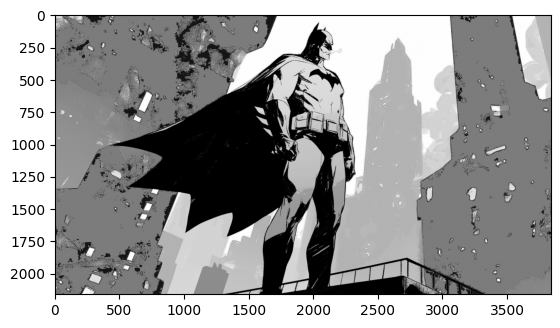

In [52]:
# Histogram Equalization
# Histogram Equalization improves
# image contrast by spreading out the most frequent intensity values

##note --- your input image should be grayscale image 
eq = cv2.equalizeHist(gray)
plt.imshow(eq, cmap="gray")
plt.show()

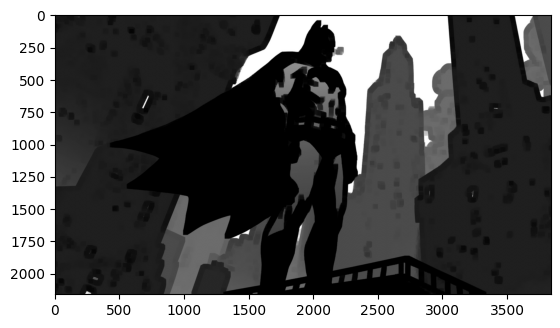

In [58]:
##erosion -- removes white pixels from the boundary of an object
# .It makes white region shrink

# eroded = cv2.erode(image, kernel, iterations=1)

kernel = np.ones((5, 5), np.uint8)

##kernel -- image modify using this kernel
eroded = cv2.erode(gray, kernel, iterations=8)
plt.imshow(eroded, cmap="gray")
plt.show()


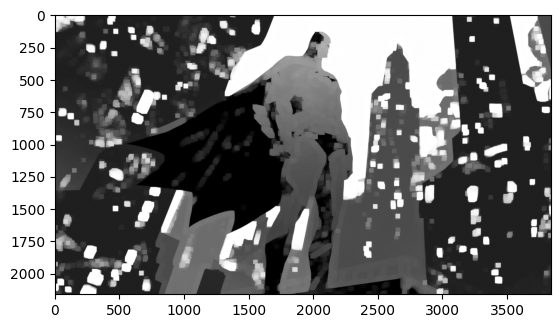

In [61]:
#dilation -- add white pixels to the boundary of an object
# .It makes white region grow

# dilated = cv2.dilate(image, kernel, iterations=1)

dilated = cv2.dilate(gray, kernel, iterations=8)
plt.imshow(dilated, cmap="gray")
plt.show()

In [ ]:
# 1️⃣ Resize an image by 1.5x in both width and height.
# Use cv2.resize() and fx, fy parameters.

# Display original and resized image side-by-side

# 2️⃣ Translate an image 100 pixels right and 50 pixels down.
# Use a translation matrix with cv2.warpAffine().

# Use dilation to restore text thickness in a thin-text image.
# Apply cv2.dilate() and display result.